In [ ]:
# Importar bibliotecas necesarias
import nltk
import unicodedata
import re
import spacy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [ ]:
# Descargar corpus real en español desde NLTK
nltk.download('cess_esp')
# Download the 'punkt_tab' resource instead of 'punkt'
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!python -m spacy download es_core_news_sm
nlp = spacy.load("es_core_news_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 56.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Obtener frases del corpus cess_esp de NLTK
corpus_nltk = nltk.corpus.cess_esp.sents()
documentos = [' '.join(sent) for sent in corpus_nltk[:10]]  # Tomamos 10 frases como ejemplo


In [ ]:
# Función de preprocesamiento
def preprocesar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = unicodedata.normalize('NFKC', texto)  # Normalización Unicode
    texto = re.sub(r'[^a-záéíóúüñ ]', '', texto)  # Eliminar caracteres especiales
    tokens = word_tokenize(texto, language='spanish')  # Tokenización
    stop_words = set(stopwords.words('spanish'))  # Stop words en español
    tokens = [palabra for palabra in tokens if palabra not in stop_words]  # Eliminar stop words
    tokens = [nlp(palabra)[0].lemma_ for palabra in tokens]  # Lematización con SpaCy
    stemmer = SnowballStemmer('spanish')  # Stemming con Snowball
    tokens = [stemmer.stem(palabra) for palabra in tokens]
    return ' '.join(tokens)

In [ ]:
# Aplicar preprocesamiento
corpus_preprocesado = [preprocesar_texto(doc) for doc in documentos]

print("Corpus preprocesado:")
print(corpus_preprocesado, "\n")

Corpus preprocesado:
['grup estatal electricitedefranc fpa edf fpt anunci hoy juev compr porcient empres mexican electricidadaguiladealtamir fpa eair fpt cre japones mitsubishicorporation ponerenmarch central gas megavati', 'portavoz edf explic efe proyect construccion altamir nort tampic prev utiliz gas natural combust principal central cicl combin deb empez funcion mayodel', 'electr produc pas red electr public mexic envirtudd acuerd vent energ eair comisionfederaldeelectr fpa cfe fpt duracion año', 'edf quer revel cuant pag particip mayoritari eair interven asistent construccion altamir posterior encarg explotar el principal accion', 'edf mitsubishi particip licit licenci constru central electr mexic qued dos cad riobrav saltill compañ frances altamir tuxpan japones', 'edf previst invert millon eur fpa millon dolar fpt central riobrav potenci megavati millon eur fpa millon dolar fpt saltill primer funcion gas natural cuy potenci previst megavati', 'alcaldes malag cabez list pp congr

In [ ]:
# Vectorización One-Hot Encoding
vectorizador_onehot = CountVectorizer(binary=True)
X_onehot = vectorizador_onehot.fit_transform(corpus_preprocesado)
print("One-Hot Encoding:")
print(pd.DataFrame(X_onehot.toarray(), columns=vectorizador_onehot.get_feature_names_out()), "\n")

One-Hot Encoding:
   abraz  accion  acuerd  administr  alcaldes  altamir  anunci  apost  asegur  \
0      0       0       0          0         0        0       1      0       0   
1      0       0       0          0         0        1       0      0       0   
2      0       0       1          0         0        0       0      0       0   
3      0       1       0          0         0        1       0      0       0   
4      0       0       0          0         0        1       0      0       0   
5      0       0       0          0         0        0       0      0       0   
6      0       0       0          1         1        0       0      0       0   
7      0       0       0          0         0        0       0      0       0   
8      1       0       0          0         0        0       0      1       0   
9      0       0       0          0         0        0       0      0       1   

   asistent  ...  subray  tampic  tod  transmit  tuxpan  utiliz  val  vent  \
0         0 

In [ ]:
# Vectorización Bag of Words (BoW)
vectorizador_bow = CountVectorizer()
X_bow = vectorizador_bow.fit_transform(corpus_preprocesado)
print("Bag of Words:")
print(pd.DataFrame(X_bow.toarray(), columns=vectorizador_bow.get_feature_names_out()), "\n")

Bag of Words:
   abraz  accion  acuerd  administr  alcaldes  altamir  anunci  apost  asegur  \
0      0       0       0          0         0        0       1      0       0   
1      0       0       0          0         0        1       0      0       0   
2      0       0       1          0         0        0       0      0       0   
3      0       1       0          0         0        1       0      0       0   
4      0       0       0          0         0        1       0      0       0   
5      0       0       0          0         0        0       0      0       0   
6      0       0       0          1         1        0       0      0       0   
7      0       0       0          0         0        0       0      0       0   
8      1       0       0          0         0        0       0      1       0   
9      0       0       0          0         0        0       0      0       1   

   asistent  ...  subray  tampic  tod  transmit  tuxpan  utiliz  val  vent  \
0         0  ...

TF-IDF con princesas de Disney

In [2]:
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 51.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
import re
import spacy
import unicodedata
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# Cargar el modelo de spaCy en español
try:
    nlp = spacy.load("es_core_news_sm")
except OSError as e:
    print(f"Error loading model: {e}")
    print("Please ensure the model is correctly installed using: `!python -m spacy download es_core_news_sm`")
    raise e # Re-raise the exception so that the notebook fails.

In [5]:


# Descripciones de las princesas de Disney
descriptions = [
    "Cenicienta es un personaje ficticio y la protagonista de la película animada de 1950 'La Cenicienta' de Disney. En la película original, su voz fue interpretada por la actriz Ilene Woods.",
    "Aurora, conocida como la Bella Durmiente, es la hija única del Rey Estéfano y la Reina Flor. Aurora es retratada como una joven amable, juguetona, tímida y gentil, que ama a los animales y puede hablar con ellos.",
    "Pocahontas es la primera y única Princesa Disney en tener dos intereses amorosos. Sin embargo, la mayoría de los medios de comunicación, incluyendo la franquicia de las Princesas Disney, mantienen a John Smith en una relación con Pocahontas, ignorando por completo a John Rolfe.",
    "Tiana, protagonista de 'La Princesa y el Sapo', está basada libremente en dos princesas: la princesa Emma, heroína de la novela de 2002 de E. D. Baker, 'La princesa rana', y la princesa del cuento de hadas de los hermanos Grimm 'El príncipe rana'.",
    "Jasmín es la sexta princesa Disney y el primer miembro no europeo de la franquicia, así como la primera princesa de Asia occidental, por lo que se le atribuye el mérito de introducir la diversidad racial en el género de Princesas Disney."
]



In [7]:
def preprocess_text(text):
    """
    Realiza preprocesamiento del texto:
    - Normaliza Unicode
    - Convierte a minúsculas
    - Elimina caracteres especiales y números
    - Tokeniza y lematiza
    - Filtra stopwords
    """
    # Normalizar Unicode (eliminar tildes y caracteres especiales)
    text = unicodedata.normalize("NFKC", text)

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar caracteres especiales y números
    text = re.sub(r"[^a-záéíóúüñ ]", "", text)

    # Tokenización, lematización y eliminación de stopwords
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]

    return " ".join(tokens)



In [8]:
# Aplicar preprocesamiento a cada descripción
processed_descriptions = [preprocess_text(desc) for desc in descriptions]


In [9]:
# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_descriptions)

Matriz TF-IDF:
              actriz    amable      amar   amoroso   animado    animal  \
Cenicienta  0.235054  0.000000  0.000000  0.000000  0.235054  0.000000   
Aurora      0.000000  0.225584  0.225584  0.000000  0.000000  0.225584   
Pocahontas  0.000000  0.000000  0.000000  0.200442  0.000000  0.000000   
Tiana       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
Jasmín      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                asia  atribuir    aurora    auroro  ...     rolfe       rán  \
Cenicienta  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
Aurora      0.000000  0.000000  0.225584  0.225584  ...  0.000000  0.000000   
Pocahontas  0.000000  0.000000  0.000000  0.000000  ...  0.200442  0.000000   
Tiana       0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.393543   
Jasmín      0.232611  0.232611  0.000000  0.000000  ...  0.000000  0.000000   

                sapo     sexto     smith     tiana    tímido     

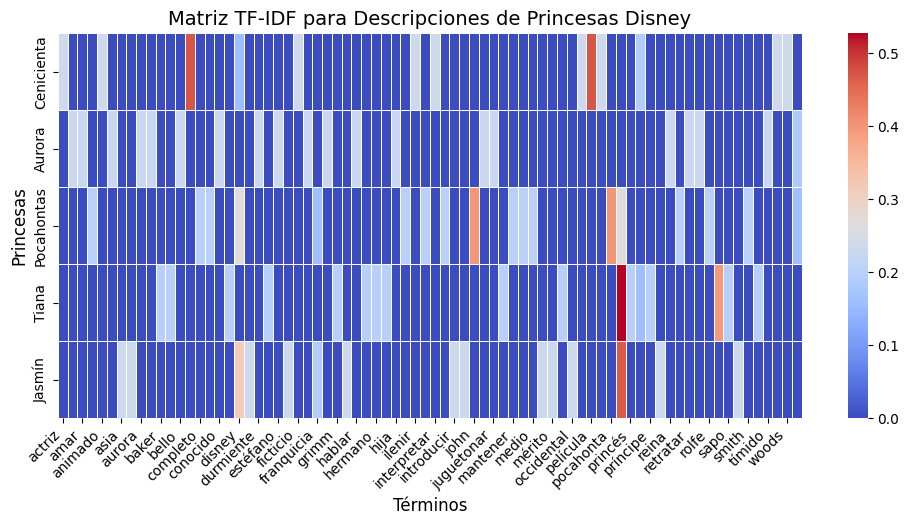

In [13]:
# Convertir a DataFrame para visualizar
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=["Cenicienta", "Aurora", "Pocahontas", "Tiana", "Jasmín"])

# Mostrar la tabla con los valores TF-IDF
print("Matriz TF-IDF:")
print(tfidf_df)

# Visualización con un mapa de calor sin anotaciones
plt.figure(figsize=(12, 5))
sns.heatmap(tfidf_df, cmap="coolwarm", linewidths=0.5, cbar=True)

# Ajustes de etiquetas
plt.title("Matriz TF-IDF para Descripciones de Princesas Disney", fontsize=14)
plt.xlabel("Términos", fontsize=12)
plt.ylabel("Princesas", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)

# Mostrar gráfico
plt.show()